************
<font color=#025172 font size="+3"><center><b> Notebook Code</b></center></font><br>
<font color=#025172 font size="+2.5"><center><b> PROJET n° 4 : Anticipez les besoins en consommation électrique de bâtiments</b></center></font>
************   

************
<font color=#025172 font size="+3"><b> CONTENU du Notebook</b></font><br>
************ 

* <font color=#025172 font size="+1"><b> Chapitre 1 : Inspection du dataset cleaned</b></font><br>
  - **1.1 Chargement et exploration du dataset.**<br>
       - 1.1.1 Importation des Packages nécessaires.<br>
       - 1.1.2 Chargement du dataset<br>
       - 1.1.3 Visualisation du contenu du dataset<br>
**********
* <font color=#025172 font size="+1"><b>Chapitre 2 : Préparation des données</b></font><br>
    - **2.1 Séparer le dataset en train et test datasets**<br>
        - 2.1.1 Séparation du dataset en train et test sets.<br>
        - 2.1.2 Préparation des transformers et du pipeline.<br>
**********
* <font color=#025172 font size="+1"><b>Chapitre 3 : Quel type de regression pour notre problèmatique ?</b></font><br>
    - **3.1 Comparaison des modèles SANS Tuning hyper-paramètres**<br>
        - 3.1.1 Création d'une fonction pour comparer Ridge et Randomforest sans hyperparameter tunning.<br>
        - 3.1.2 Comparaison de Ridge et Randomforest sans hyperparameter tunning.<br>
    - **3.2 Comparaison des modèles AVEC Tuning hyper-paramètres**<br>
        - 3.2.1 Création d'une fonction pour comparer Ridge et Randomforest avec hyperparameter tunning.<br>
        - 3.2.2 Comparaison de Ridge et Randomforest avec hyperparameter tunning.<br>
        - 3.2.3 Les meilleurs hyperparamètres de Randomforest.<br>
        - 3.2.3 Comparer RandomForest Regressor avec d'autre modèle non-linéaire.<br>
**********
* <font color=#025172 font size="+1"><b> Chapitre 4 : Feature selection</b></font><br>
    - **4.1 Feature selection sur la variable transformée: TotalGHGEmissions**<br>
    - **4.2 Feature selection sur la variable transformée: SiteEnergyUse(kBtu)**<br>
**********

* <font color=#025172 font size="+1"><b> Chapitre 5 : Evaluer la performance sur le dataset</b></font><br>
   - **5.1 Performance du modèle sur la variable transformée: TotalGHGEmissions**<br>
   - **5.2 Performance du modèle sur la variable transformée: SiteEnergyUse(kBtu)**<br>
   - **5.3 Comparer les performances des modèles sur le Traning et le Test set.**<br>
        - 5.3.1 Préparer les metrics pour la variable : TotalGHGEmissions.<br>
        - 5.3.2 Préparer les metrics pour la variable : SiteEnergyUse(kBtu).<br>
**********
* <font color=#025172 font size="+1"><b>Chapitre 6 : Evaluer l'impact de la variable ENERGYSTARScore</b></font><br>
    - **6.1 Impact sur la varialbe TotalGHGEmissions**<br>
        - 6.1.1 Importance de la variable ENERGYSTARScore.<br>
        - 6.1.2 Impact de la variable ENERGYSTARScore sur R^2.<br>
**********

*********
# <font color=#025172>Chapitre 1 : Inspection du dataset cleaned</font>
*********

<img src='http://www.seattle.gov/Images/Council/Logos/City-of-Seattle-Logo_Color-on-Transparent.png' width=45px align="left"/> 
<div style="vertical-align: middle">
    <h2>
    <font color=#0046AD>&emsp; 1.1 Chargement et exploration du dataset
        </font>
    </h2>
</div>

#### <font color=#0046AD> 1.1.1 Importation des Packages nécessaires.</font>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

%matplotlib inline

#### <font color=#0046AD>1.1.2 Chargement du dataset</font>

In [2]:
cleaned_data = pd.read_csv("00_data/cleaned_data.csv")

#### <font color=#0046AD>1.1.3 Visualisation du contenu du dataset</font>

In [3]:
cleaned_data.head(2)

,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,...,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,ComplianceStatus,Latitude,Longitude,Building age,transformed_TotalGHGEmissions,transformed_SiteEnergyUse(kBtu)
0,NonResidential,Housing/Hotel,Downtown,1.0,12.0,88434,0,88434,Housing/Hotel,88434.0,...,5019.5,65.0,6981428.0,249.43,Compliant,47.612190,-122.337997,88,4.140212,28.773852
1,NonResidential,Housing/Hotel,Downtown,1.0,11.0,103566,15064,88502,Housing/Hotel,83880.0,...,4622.0,51.0,8354235.0,263.51,Compliant,47.613106,-122.333358,19,4.169932,29.318533


In [4]:
cleaned_data.drop_duplicates()

,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,...,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,ComplianceStatus,Latitude,Longitude,Building age,transformed_TotalGHGEmissions,transformed_SiteEnergyUse(kBtu)
0,NonResidential,Housing/Hotel,Downtown,1.0,12.0,88434,0,88434,Housing/Hotel,88434.0,...,5019.5,65.0,6.981428e+06,249.43,Compliant,47.612190,-122.337997,88,4.140212,28.773852
1,NonResidential,Housing/Hotel,Downtown,1.0,11.0,103566,15064,88502,Housing/Hotel,83880.0,...,4622.0,51.0,8.354235e+06,263.51,Compliant,47.613106,-122.333358,19,4.169932,29.318533
2,NonResidential,Housing/Hotel,Downtown,1.0,41.0,961990,0,961990,Housing/Hotel,757243.0,...,0.0,18.0,7.313066e+07,2061.48,Compliant,47.613349,-122.337699,46,5.165848,36.472291
3,NonResidential,Housing/Hotel,Downtown,1.0,18.0,119890,12460,107430,Housing/Hotel,123445.0,...,0.0,67.0,1.482910e+07,507.70,Compliant,47.613754,-122.340924,35,4.511763,31.106263
4,Nonresidential COS,Other,Downtown,1.0,2.0,97288,37198,60090,Government building,88830.0,...,5019.5,76.0,1.205198e+07,304.62,Compliant,47.616439,-122.336764,16,4.247570,30.451926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,Nonresidential COS,Office,Greater duwamish,1.0,1.0,12294,0,12294,Office,12294.0,...,5019.5,46.0,8.497457e+05,20.94,No info,47.567220,-122.311540,26,2.618782,22.869851
3041,Nonresidential COS,Other,Downtown,1.0,1.0,16000,0,16000,Entertainment,16000.0,...,5019.5,76.0,9.502762e+05,32.17,Compliant,47.596250,-122.322830,12,2.906565,23.161899
3042,Nonresidential COS,Other,Magnolia / queen anne,1.0,1.0,13157,0,13157,Entertainment,7583.0,...,0.0,76.0,5.765898e+06,223.54,Compliant,47.636440,-122.357840,42,4.080384,28.200923
3043,Nonresidential COS,Mixed Use Property,Greater duwamish,1.0,1.0,14101,0,14101,Entertainment,6601.0,...,484.0,76.0,7.194712e+05,22.11,Compliant,47.528320,-122.324310,27,2.655677,22.439394


In [5]:
cleaned_data.shape

(3045, 23)

In [6]:
cleaned_data.isna().mean().sort_values(ascending=False) * 100

BuildingType                       0.0
ThirdLargestPropertyUseType        0.0
transformed_TotalGHGEmissions      0.0
Building age                       0.0
Longitude                          0.0
Latitude                           0.0
ComplianceStatus                   0.0
TotalGHGEmissions                  0.0
SiteEnergyUse(kBtu)                0.0
ENERGYSTARScore                    0.0
ThirdLargestPropertyUseTypeGFA     0.0
SecondLargestPropertyUseTypeGFA    0.0
PrimaryPropertyType                0.0
SecondLargestPropertyUseType       0.0
LargestPropertyUseTypeGFA          0.0
LargestPropertyUseType             0.0
PropertyGFABuilding(s)             0.0
PropertyGFAParking                 0.0
PropertyGFATotal                   0.0
NumberofFloors                     0.0
NumberofBuildings                  0.0
Neighborhood                       0.0
transformed_SiteEnergyUse(kBtu)    0.0
dtype: float64

In [7]:
cleaned_data.dtypes.sort_values()

Building age                         int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
SecondLargestPropertyUseTypeGFA    float64
Longitude                          float64
Latitude                           float64
TotalGHGEmissions                  float64
SiteEnergyUse(kBtu)                float64
ENERGYSTARScore                    float64
ThirdLargestPropertyUseTypeGFA     float64
transformed_SiteEnergyUse(kBtu)    float64
LargestPropertyUseTypeGFA          float64
NumberofFloors                     float64
NumberofBuildings                  float64
transformed_TotalGHGEmissions      float64
ThirdLargestPropertyUseType         object
SecondLargestPropertyUseType        object
LargestPropertyUseType              object
ComplianceStatus                    object
Neighborhood                        object
PrimaryPropertyType                 object
BuildingType                        object
dtype: obje

*********
# <font color=#025172>Chapitre 2 : Préparation des données</font>
*********

<img src='http://www.seattle.gov/Images/Council/Logos/City-of-Seattle-Logo_Color-on-Transparent.png' width=45px align="left"/> 
<div style="vertical-align: middle">
    <h2>
    <font color=#0046AD>&emsp; 2.1 Séparer le dataset en train et test datasets
        </font>
    </h2>
</div>

#### <font color=#0046AD>2.1.1 Séparation du dataset en train et test sets.</font>

In [8]:
from sklearn.model_selection import train_test_split

np.random.seed(20)

# Liste des variables à prédire (données brutes et données transformées)
Y_list = [
    "TotalGHGEmissions",
    "SiteEnergyUse(kBtu)",
    "transformed_TotalGHGEmissions",
    "transformed_SiteEnergyUse(kBtu)",
]


# Séparer le dataset en train et test sets.
X = cleaned_data.drop(Y_list, axis=1).copy()

# y_emission_or : emission co2, données brutes non transformées.
y_emission_or = cleaned_data["TotalGHGEmissions"].copy()

# y_emission_tr : emission co2, données transformées.
y_emission_tr = cleaned_data["transformed_TotalGHGEmissions"].copy()

# y_energy_or : consommation énergétique, données brutes non transformées.
y_energy_or = cleaned_data["SiteEnergyUse(kBtu)"].copy()

# y_emission_tr : consommation énergétique, données transformées.
y_energy_tr = cleaned_data["transformed_SiteEnergyUse(kBtu)"].copy()


# train & test dataset avec y_emission_or (données brutes non transformées)
X_train_co2_or, X_test_co2_or, y_train_co2_or, y_test_co2_or = train_test_split(
    X, y_emission_or, test_size=0.2, random_state=20
)

# train & test dataset avec y_emission_tr (données transformées)
X_train_co2_tr, X_test_co2_tr, y_train_co2_tr, y_test_co2_tr = train_test_split(
    X, y_emission_tr, test_size=0.2, random_state=20
)

# train & test dataset avec y_energy_or (données brutes non transformées)
(
    X_train_energy_or,
    X_test_energy_or,
    y_train_energy_or,
    y_test_energy_or,
) = train_test_split(X, y_energy_or, test_size=0.2, random_state=20)

# train & test dataset avec y_energy_tr (données transformées)
(
    X_train_energy_tr,
    X_test_energy_tr,
    y_train_energy_tr,
    y_test_energy_tr,
) = train_test_split(X, y_energy_tr, test_size=0.2, random_state=20)

#### <font color=#0046AD>2.1.2 Préparation des transformers et du pipeline.</font>
- Transformation des variables qualitatives (OneHot Encoder)
- Standardisation des variables quantitatives (StandardScaler)

In [9]:
# cat_unique_values = pd.unique(cleaned_data.select_dtypes(include=["object"]).values.ravel())
# ohe_cat = [cat_unique_values]*cleaned_data.select_dtypes(include=["object"]).shape[1]

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

np.random.seed(20)

# Lister les variables quantitatives et les variables qualitatives
# Initialisation des transformers

categorical_columns = cleaned_data.select_dtypes(include=["object"]).columns
categorical_transformer = Pipeline(
    steps=[("onehot", OneHotEncoder(#categories=ohe_cat
                                    sparse=False, 
                                    handle_unknown="ignore")
           )] 
)


numerical_columns = (
    cleaned_data.select_dtypes(include=["int64", "float64"])
    .drop(Y_list, axis=1)
    .columns
)
numerical_transformer = Pipeline(steps=[("scaler", StandardScaler())])


# Combiner les transformers dans une étape preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer, numerical_columns),
        ("categorical", categorical_transformer, categorical_columns),
    ],
    remainder="passthrough",
)


# Créer une Pipeline avec l'étape preprocessor et le model

# pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", Ridge())])


*********
# <font color=#025172>Chapitre 3 : Quel type de regression pour notre problèmatique ?</font>
*********

<img src='http://www.seattle.gov/Images/Council/Logos/City-of-Seattle-Logo_Color-on-Transparent.png' width=45px align="left"/> 
<div style="vertical-align: middle">
    <h2>
    <font color=#0046AD>&emsp; 3.1 Comparaison des modèles SANS Tuning hyper-paramètres  
        </font>
    </h2>
</div>

- L'objectif de cette section est de répondre à la question suivante : 
    - Quel type de régression est le plus adaptée à notre problématique (régression linéaire ou régression non linéaire) ?
    - Pour cela nous allons comparer 2 modèles :
        - Un modèle linéaire **Ridge** vs un modèle non-linéaire **Randomforeset**. 

#### <font color=#0046AD>3.1.1 Création d'une fonction pour comparer Ridge et Randomforest sans hyperparameter tunning.</font>

In [11]:
def cross_evaluate_models(estimators, X_train_or, y_train_or, X_train_tr, y_train_tr, y_name):

    from sklearn.model_selection import cross_validate
    from sklearn.model_selection import KFold
    from sklearn.base import clone

    model_cvs = {}
    names = []
    r2_or = []
    mae_or = []
    rmse_or = []
    r2_tr = []
    mae_tr = []
    rmse_tr = []

    
    np.random.seed(20)
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=20)


    for model_name, model in estimators.items():
        pipeline = Pipeline(steps=[("preprocessor", preprocessor), (model_name, model)])

        or_cv_results = cross_validate(
            pipeline,
            X_train_or,
            y_train_or,
            cv=kfold,
            scoring=["r2", 
                     "neg_mean_absolute_error", 
                     "neg_root_mean_squared_error"
                    ],
            n_jobs=-2,
            error_score="raise",
        )

        cv_r2 = round(or_cv_results["test_r2"].mean() * 100, 2)
        cv_mae = round(or_cv_results["test_neg_mean_absolute_error"].mean(), 2)
        cv_rmse = round(or_cv_results["test_neg_root_mean_squared_error"].mean(), 2)
        
        
        #     print("RMSE : ", cv_rmse)
        #     print("-" * 80)

        r2_or.append(cv_r2)
        mae_or.append(cv_mae)
        rmse_or.append(cv_rmse)

        tr_cv_results = cross_validate(
            pipeline,
            X_train_tr,
            y_train_tr,
            cv=kfold,
            scoring=["r2", 
                     "neg_mean_absolute_error", 
                     "neg_root_mean_squared_error"
                    ],
            n_jobs=-2,
            error_score="raise",
        )

        tr_cv_r2 = round(tr_cv_results["test_r2"].mean() * 100,2)
        tr_cv_mae = round(tr_cv_results["test_neg_mean_absolute_error"].mean(),2)
        tr_cv_rmse = round(tr_cv_results["test_neg_root_mean_squared_error"].mean(),2)

        r2_tr.append(tr_cv_r2)
        mae_tr.append(tr_cv_mae)
        rmse_tr.append(tr_cv_rmse)
        
        names.append(model_name)
        
    df = pd.DataFrame(
        {"R^2_or": r2_or,
         "MAE_or": mae_or,
         "RMSE_or": rmse_or,
         "R^2_tr": r2_tr,
         "MAE_tr": mae_tr,
         "RMSE_tr": rmse_tr,
        },
        index=names,
    ).sort_values(by="R^2_or", ascending=False)

    columns = [
            (y_name + " original data", "R^2_or"),
            (y_name + " original data", "MAE_or"),
            (y_name + " original data", "RMSE_or"),
            (y_name + " transformed data", "R^2_tr"),
            (y_name + " transformed data", "MAE_tr"),
            (y_name + " transformed data", "RMSE_tr"),
        ]

    df.columns = pd.MultiIndex.from_tuples(columns)

    return df

#### <font color=#0046AD>3.1.2 Comparaison de Ridge et Randomforest sans hyperparameter tunning.</font>

- Nous allons comparer les 2 modèles sans modification des hyper-paramètres.<br>
- Nous allons également utiliser une **Cross-Validation** pour comparer les scores des 2 modèles sur le **train set**.

In [12]:
models_list = {
    "Ridge": Ridge(), # Un modèle linéaire
    "randomforestregressor": RandomForestRegressor(random_state=20), # Un modèle non-lineaire
}

In [13]:
%%time
co2_models= cross_evaluate_models(
    estimators=models_list,
    X_train_or=X_train_co2_or,
    y_train_or=y_train_co2_or,
    X_train_tr=X_train_co2_tr,
    y_train_tr=y_train_co2_tr,
    y_name="TotalGHGEmissions",
)

Wall time: 11.3 s


In [14]:
%%time
energy_models= cross_evaluate_models(
    estimators=models_list,
    X_train_or=X_train_energy_or,
    y_train_or=y_train_energy_or,
    X_train_tr=X_train_energy_tr,
    y_train_tr=y_train_energy_tr,
    y_name="SiteEnergyUse(kBtu)",
)

Wall time: 6.8 s


In [15]:
baseline_models = pd.concat([co2_models,energy_models], axis=1)
baseline_models

TotalGHGEmissions original data                  \
                                               R^2_or  MAE_or RMSE_or   
randomforestregressor                           67.21  -84.38 -306.63   
Ridge                                           20.41 -196.75 -437.48   

                      TotalGHGEmissions transformed data                 \
                                                  R^2_tr MAE_tr RMSE_tr   
randomforestregressor                              72.19  -0.35   -0.49   
Ridge                                              40.99  -0.57   -0.72   

                      SiteEnergyUse(kBtu) original data              \
                                                 R^2_or      MAE_or   
randomforestregressor                             82.40 -2407717.87   
Ridge                                             40.71 -5305501.29   

                                   SiteEnergyUse(kBtu) transformed data  \
                           RMSE_or                               R^2_tr   
randomforestregressor  -7563404.12                                84.99   
Ridge                 -12447287.52                                62.52   

                                      
                      MAE_tr RMSE_tr  
randomforestregressor  -0.96   -1.47  
Ridge                  -1.80   -2.34

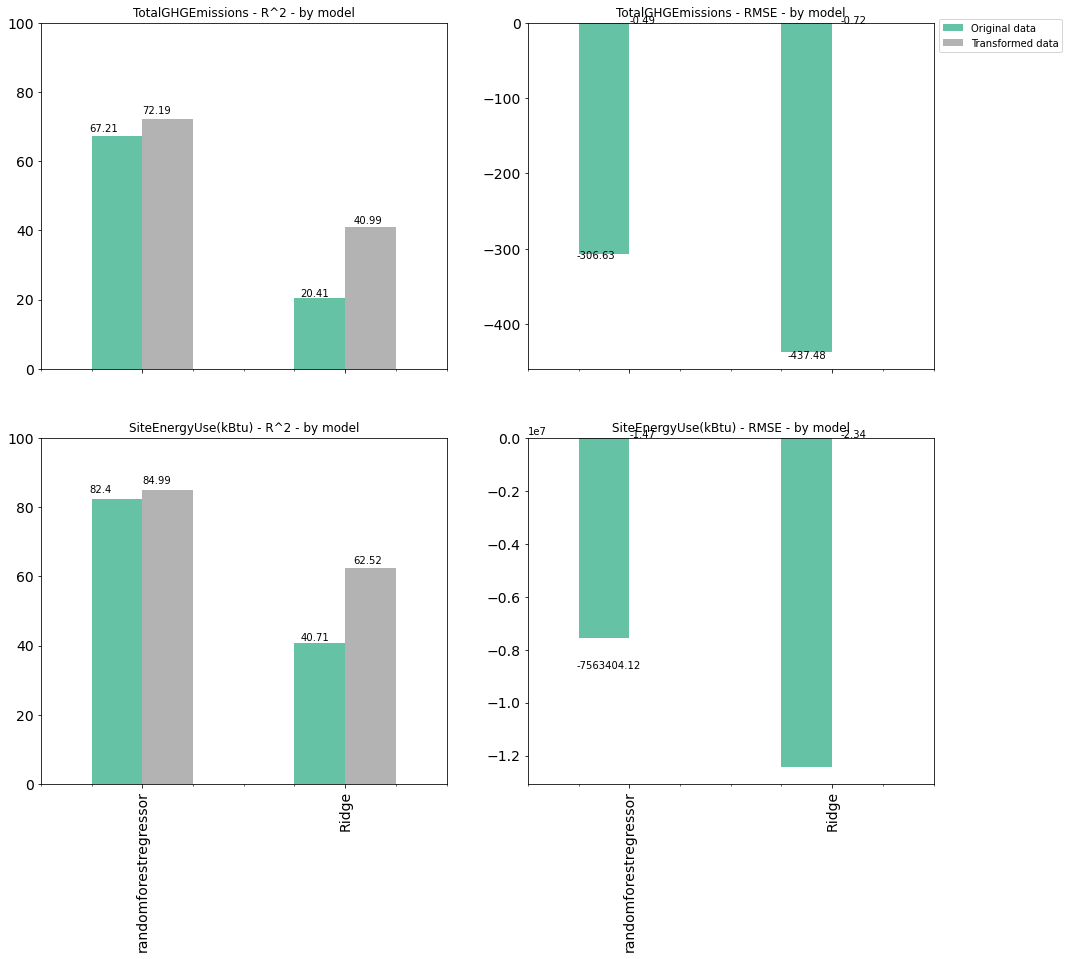

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 14), sharex=True)

baseline_models.iloc[
    :,
    (
        baseline_models.columns.get_level_values(0).isin(
            ["TotalGHGEmissions original data", "TotalGHGEmissions transformed data"]
        )
    )
    & (baseline_models.columns.get_level_values(1).isin(["R^2_or", "R^2_tr"])),
].plot(
    kind="bar",
    title="TotalGHGEmissions - R^2 - by model",
    style="seaborn-white",
    fontsize=14,
    colormap="Set2",
    ax=ax[0, 0],
    legend=False,
    ylim=[0, 100],
)
# ax[0,0].legend()
ax[0, 0].legend(
    ["Original data", "Transformed data"], loc="lower left", bbox_to_anchor=(2.2, 0.9)
)

# ax.hlines(23, -.5,.5, linestyles='dashed')

baseline_models.iloc[
    :,
    (
        baseline_models.columns.get_level_values(0).isin(
            ["TotalGHGEmissions original data", "TotalGHGEmissions transformed data"]
        )
    )
    & (baseline_models.columns.get_level_values(1).isin(["RMSE_or", "RMSE_tr"])),
].plot(
    kind="bar",
    title="TotalGHGEmissions - RMSE - by model",
    style="seaborn-white",
    fontsize=14,
    colormap="Set2",
    ax=ax[0, 1],
    legend=False,
)

baseline_models.iloc[
    :,
    (
        baseline_models.columns.get_level_values(0).isin(
            [
                "SiteEnergyUse(kBtu) original data",
                "SiteEnergyUse(kBtu) transformed data",
            ]
        )
    )
    & (baseline_models.columns.get_level_values(1).isin(["R^2_or", "R^2_tr"])),
].plot(
    kind="bar",
    title="SiteEnergyUse(kBtu) - R^2 - by model",
    style="seaborn-white",
    fontsize=14,
    colormap="Set2",
    ax=ax[1, 0],
    legend=False,
    ylim=[0, 100],
)

# ax.hlines(23, -.5,.5, linestyles='dashed')

baseline_models.iloc[
    :,
    (
        baseline_models.columns.get_level_values(0).isin(
            [
                "SiteEnergyUse(kBtu) original data",
                "SiteEnergyUse(kBtu) transformed data",
            ]
        )
    )
    & (baseline_models.columns.get_level_values(1).isin(["RMSE_or", "RMSE_tr"])),
].plot(
    kind="bar",
    title="SiteEnergyUse(kBtu) - RMSE - by model",
    style="seaborn-white",
    fontsize=14,
    colormap="Set2",
    ax=ax[1, 1],
    legend=False,
)

for p in ax[0, 0].patches:
    ax[0, 0].annotate(str(p.get_height()), (p.get_x() * 1.04, p.get_height() * 1.02))

for p in ax[0, 1].patches:
    ax[0, 1].annotate(str(p.get_height()), (p.get_x() * 1.04, p.get_height() * 1.02))

for p in ax[1, 0].patches:
    ax[1, 0].annotate(str(p.get_height()), (p.get_x() * 1.04, p.get_height() * 1.02))

for p in ax[1, 1].patches:
    ax[1, 1].annotate(str(p.get_height()), (p.get_x() * 1.04, p.get_height() * 1.15))

<blockquote>
    - RandomForestRegressor a les meilleurs scores  R^2 et MAE/RMSE sur les 2 variables.<br>
    - Les variables transformées sont celles qui donnent les meilleurs scores R^2 et MAE/RMSE.<br>
    - Nous sommes peut-être en face d'un problème de regression non linéaire à confirmer dans la suite de l'analyse.<br>
</blockquote>

<img src='http://www.seattle.gov/Images/Council/Logos/City-of-Seattle-Logo_Color-on-Transparent.png' width=45px align="left"/> 
<div style="vertical-align: middle">
    <h2>
    <font color=#0046AD>&emsp; 3.2 Comparaison des modèles AVEC Tuning hyper-paramètres  
        </font>
    </h2>
</div>

#### <font color=#0046AD>3.2.1 Création d'une fonction pour comparer Ridge et Randomforest avec hyperparameter tunning.</font>

- Nous allons utiliser **RandomizedSearchCV** pour chercher les meilleures valeurs des hyper-paramètres des 2 modèles.<br>
- Nous allons également utiliser une **Cross-Validation** pour comparer les scores des 2 modèles sur le **train set**.

In [17]:
def cross_evaluate_tunned_models(
    estimators, X_train_or, y_train_or, X_train_tr, y_train_tr, y_name, grid,n_iter, n_fold
):

    from sklearn.model_selection import KFold
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.base import clone
    
    np.random.seed(20)
    
    model_cvs = {}
    names = []
    r2_or = []
    mae_or = []
    rmse_or = []
    r2_tr = []
    mae_tr = []
    rmse_tr = []
    or_best_estimator_dict = {}
    tr_best_estimator_dict = {}

    kfold = KFold(n_splits=n_fold, shuffle=True, random_state=20)

    for model_name, model in estimators.items():
        pipeline = Pipeline(steps=[("preprocessor", preprocessor), (model_name, model)])

        or_random_search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=grid,
            cv=kfold,
            n_iter=n_iter,
            verbose=True,
            scoring=["r2", 
             "neg_mean_absolute_error", 
             "neg_root_mean_squared_error"
            ],
            refit="r2",
            n_jobs=-2,
            random_state=20,
        ).fit(X_train_or,y_train_or)

        or_cv_r2 = round(or_random_search.cv_results_["mean_test_r2"].mean()*100,2)
        or_cv_mae = round(or_random_search.cv_results_["mean_test_neg_mean_absolute_error"].mean(),2)
        or_cv_rmse = round(or_random_search.cv_results_["mean_test_neg_root_mean_squared_error"].mean(),2)

        r2_or.append(or_cv_r2)
        mae_or.append(or_cv_mae)
        rmse_or.append(or_cv_rmse)
        
        or_best_estimator_dict.update({model_name:or_random_search.best_estimator_})
        
        or_random_search = clone(or_random_search,safe=False)
        
        tr_random_search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=grid,
            cv=kfold,
            n_iter=n_iter,
            verbose=True,
            scoring=["r2", 
             "neg_mean_absolute_error", 
             "neg_root_mean_squared_error"
            ],
            refit="r2",
            n_jobs=-2,
            random_state=20,
        ).fit(X_train_tr,y_train_tr)

        tr_cv_r2 = round(tr_random_search.cv_results_["mean_test_r2"].mean()*100,2)
        tr_cv_mae = round(tr_random_search.cv_results_["mean_test_neg_mean_absolute_error"].mean(),2)
        tr_cv_rmse = round(tr_random_search.cv_results_["mean_test_neg_root_mean_squared_error"].mean(),2)

        r2_tr.append(tr_cv_r2)
        mae_tr.append(tr_cv_mae)
        rmse_tr.append(tr_cv_rmse)
        
        tr_best_estimator_dict.update({model_name:tr_random_search.best_estimator_})
        
        names.append(model_name)
        
        tr_random_search = clone(tr_random_search,safe=False)

    df = pd.DataFrame(
        {
            "R^2_or": r2_or,
            "MAE_or": mae_or,
            "RMSE_or": rmse_or,
            "R^2_tr": r2_tr,
            "MAE_tr": mae_tr,
            "RMSE_tr": rmse_tr,
        },
        index=names,
    ).sort_values(by="R^2_or", ascending=False)

    columns = [
        (y_name + " original data", "R^2_or"),
        (y_name + " original data", "MAE_or"),
        (y_name + " original data", "RMSE_or"),
        (y_name + " transformed data", "R^2_tr"),
        (y_name + " transformed data", "MAE_tr"),
        (y_name + " transformed data", "RMSE_tr"),
    ]

    df.columns = pd.MultiIndex.from_tuples(columns)

    return df, or_best_estimator_dict,tr_best_estimator_dict

#### <font color=#0046AD>3.2.2 Comparaison de Ridge et Randomforest avec hyperparameter tunning.</font>

- Définition de l'espace (valeurs des hyper-paramètres) à tester pour chaque modèle.

In [18]:
Randomforest_grid = {
    # Nombre d'arbres dans la forêt aléatoire
    "randomforestregressor__n_estimators": [100, 400, 800], #[500, 1000, 2000],
    # Méthode de sélection des échantillons pour l'apprentissage de chaque arbre
    "randomforestregressor__bootstrap":[True, False],
    # Nombre maximum de niveaux dans l'arborescence de la forêt
    "randomforestregressor__max_depth": [None, 30],    
    # Nombre de variable à prendre en compte à chaque fractionnement
    "randomforestregressor__max_features":[0.33, 0.44],
    #"randomforestregressor__random_state":[20],   

}


Ridge_grid = {
    "Ridge__alpha": [float(x) for x in np.linspace(0.001, 1, 20)],
    "Ridge__solver" : ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"],
    "Ridge__normalize" : [True, False]
}

- Identification du meilleur modèle Ridge.

In [19]:
%%time
(
    ridge_tunned_co2, # Dataframe with R2, MAE, RMSE on co2 Emission  data 
    or_ridge_best_esimator_co2, # best Ridge estimator on co2 Emission original data
    tr_ridge_best_estimator_co2,# best Ridge estimator on co2 Emission transformed data
) = cross_evaluate_tunned_models(
    estimators={"Ridge": Ridge()},
    X_train_or=X_train_co2_or,
    y_train_or=y_train_co2_or,
    X_train_tr=X_train_co2_tr,
    y_train_tr=y_train_co2_tr,
    y_name="TotalGHGEmissions",
    grid=Ridge_grid,
    n_iter=15,
    n_fold=4
)

(
    ridge_tunned_energy, # Dataframe with R2, MAE, RMSE on energy use data 
    or_ridge_best_esimator_energy, # best Ridge estimator on energy use original data
    tr_ridge_best_estimator_energy,# best Ridge estimator on energy use transformed data
) = cross_evaluate_tunned_models(
    estimators={"Ridge": Ridge()},
    X_train_or=X_train_energy_or,
    y_train_or=y_train_energy_or,
    X_train_tr=X_train_energy_tr,
    y_train_tr=y_train_energy_tr,
    y_name="SiteEnergyUse(kBtu)",
    grid=Ridge_grid,
    n_iter=15,
    n_fold=4
)

ridge_tunned = pd.concat([ridge_tunned_co2,ridge_tunned_energy], axis=1)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Wall time: 17.9 s


- Identification du meilleur modèle RandomForesetRegressor.

In [20]:
%%time
(
    randomforest_tunned_co2, # Dataframe with R2, MAE, RMSE on co2 Emission  data 
    or_randomforest_best_esimator_co2, # best randomforest estimator on co2 Emission original data
    tr_randomforest_best_estimator_co2,# best randomforest estimator on co2 Emission transformed data
) = cross_evaluate_tunned_models(
    estimators={"randomforestregressor": RandomForestRegressor()},
    X_train_or=X_train_co2_or,
    y_train_or=y_train_co2_or,
    X_train_tr=X_train_co2_tr,
    y_train_tr=y_train_co2_tr,
    y_name="TotalGHGEmissions",
    grid=Randomforest_grid,
    n_iter=15,
    n_fold=4
)

(
    randomforest_tunned_energy, # Dataframe with R2, MAE, RMSE on energy use data 
    or_randomforest_best_esimator_energy, # best randomforest estimator on energy use original data
    tr_randomforest_best_estimator_energy,# best randomforest estimator on energy use transformed data
) = cross_evaluate_tunned_models(
    estimators={"randomforestregressor": RandomForestRegressor()},
    X_train_or=X_train_energy_or,
    y_train_or=y_train_energy_or,
    X_train_tr=X_train_energy_tr,
    y_train_tr=y_train_energy_tr,
    y_name="SiteEnergyUse(kBtu)",
    grid=Randomforest_grid,
    n_iter=15,
    n_fold=4
)

randomforest_tunned = pd.concat([randomforest_tunned_co2,randomforest_tunned_energy], axis=1)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Wall time: 7min 9s


In [21]:
models_tunned_step1 = pd.concat([randomforest_tunned,ridge_tunned])
models_tunned_step1

TotalGHGEmissions original data                  \
                                               R^2_or  MAE_or RMSE_or   
randomforestregressor                           78.39  -69.15 -233.12   
Ridge                                           27.38 -178.94 -448.73   

                      TotalGHGEmissions transformed data                 \
                                                  R^2_tr MAE_tr RMSE_tr   
randomforestregressor                              74.31  -0.31   -0.48   
Ridge                                              40.19  -0.57   -0.73   

                      SiteEnergyUse(kBtu) original data              \
                                                 R^2_or      MAE_or   
randomforestregressor                             86.71 -2028703.77   
Ridge                                             43.58 -4935660.39   

                                   SiteEnergyUse(kBtu) transformed data  \
                           RMSE_or                               R^2_tr   
randomforestregressor  -6098220.40                                86.57   
Ridge                 -12781509.49                                61.40   

                                      
                      MAE_tr RMSE_tr  
randomforestregressor  -0.85   -1.39  
Ridge                  -1.84   -2.37

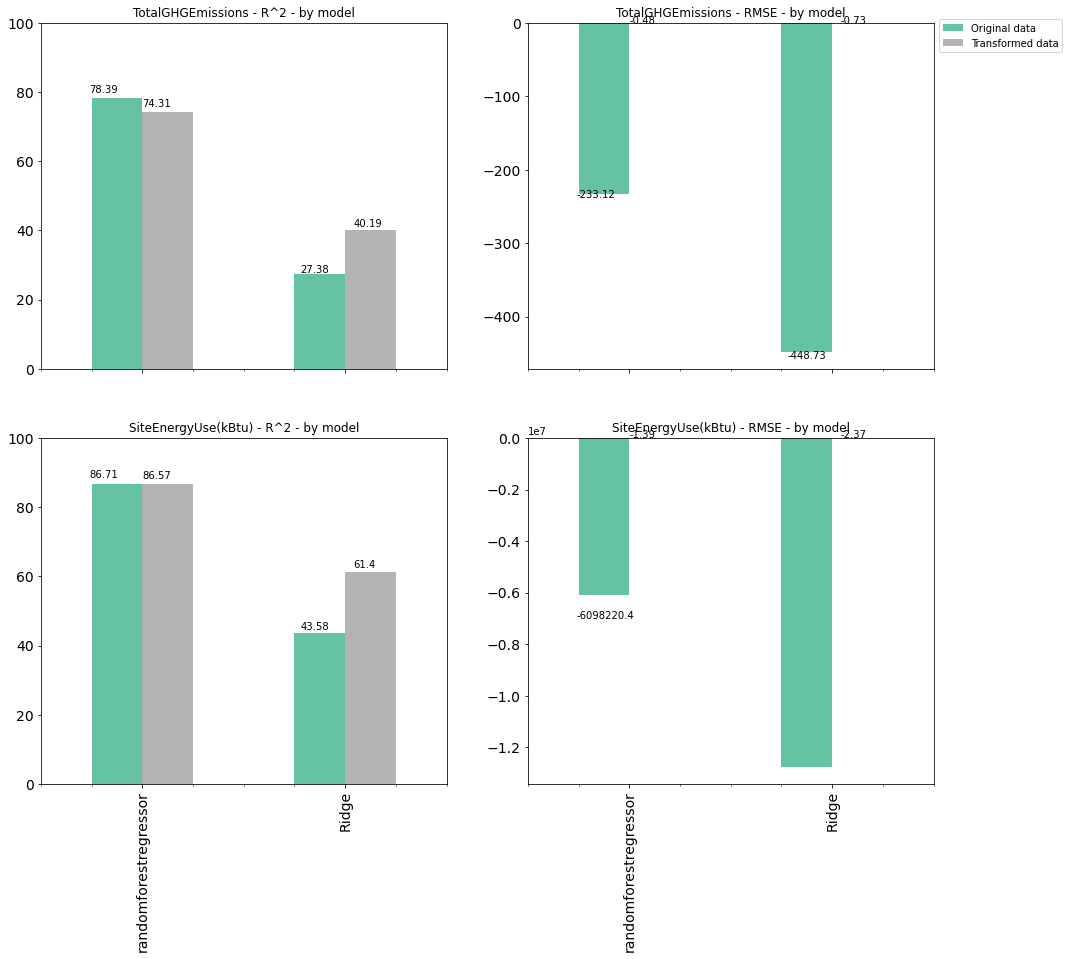

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 14), sharex=True)

models_tunned_step1.iloc[
    :,
    (
        models_tunned_step1.columns.get_level_values(0).isin(
            ["TotalGHGEmissions original data", "TotalGHGEmissions transformed data"]
        )
    )
    & (models_tunned_step1.columns.get_level_values(1).isin(["R^2_or", "R^2_tr"])),
].plot(
    kind="bar",
    title="TotalGHGEmissions - R^2 - by model",
    style="seaborn-white",
    fontsize=14,
    colormap="Set2",
    ax=ax[0, 0],
    legend=False,
    ylim=[0, 100],
)
# ax[0,0].legend()
ax[0, 0].legend(
    ["Original data", "Transformed data"], loc="lower left", bbox_to_anchor=(2.2, 0.9)
)

# ax.hlines(23, -.5,.5, linestyles='dashed')

models_tunned_step1.iloc[
    :,
    (
        models_tunned_step1.columns.get_level_values(0).isin(
            ["TotalGHGEmissions original data", "TotalGHGEmissions transformed data"]
        )
    )
    & (models_tunned_step1.columns.get_level_values(1).isin(["RMSE_or", "RMSE_tr"])),
].plot(
    kind="bar",
    title=f"TotalGHGEmissions - RMSE - by model",
    style="seaborn-white",
    fontsize=14,
    colormap="Set2",
    ax=ax[0, 1],
    legend=False,
)

models_tunned_step1.iloc[
    :,
    (
        models_tunned_step1.columns.get_level_values(0).isin(
            [
                "SiteEnergyUse(kBtu) original data",
                "SiteEnergyUse(kBtu) transformed data",
            ]
        )
    )
    & (models_tunned_step1.columns.get_level_values(1).isin(["R^2_or", "R^2_tr"])),
].plot(
    kind="bar",
    title="SiteEnergyUse(kBtu) - R^2 - by model",
    style="seaborn-white",
    fontsize=14,
    colormap="Set2",
    ax=ax[1, 0],
    legend=False,
    ylim=[0, 100],
)

# ax.hlines(23, -.5,.5, linestyles='dashed')

models_tunned_step1.iloc[
    :,    (
        models_tunned_step1.columns.get_level_values(0).isin(
            ["SiteEnergyUse(kBtu) original data", "SiteEnergyUse(kBtu) transformed data"]
        )
    )
    & (models_tunned_step1.columns.get_level_values(1).isin(["RMSE_or", "RMSE_tr"]))
].plot(
    kind="bar",
    title="SiteEnergyUse(kBtu) - RMSE - by model",
    style="seaborn-white",
    fontsize=14,
    colormap="Set2",
    ax=ax[1, 1],
    legend=False,
)

for p in ax[0, 0].patches:
    ax[0, 0].annotate(str(p.get_height()), (p.get_x() * 1.04, p.get_height() * 1.02))

for p in ax[0, 1].patches:
    ax[0, 1].annotate(str(p.get_height()), (p.get_x() * 1.04, p.get_height() * 1.02))

for p in ax[1, 0].patches:
    ax[1, 0].annotate(str(p.get_height()), (p.get_x() * 1.04, p.get_height() * 1.02))

for p in ax[1, 1].patches:
    ax[1, 1].annotate(str(p.get_height()), (p.get_x() * 1.04, p.get_height() * 1.15))

<blockquote>
    - Après cette étape,  il s'avère qu'en effet RandomForest a les meilleurs scores  R^2 et MAE/RMSE sur les 2 variables.<br>
    - Cela confirme  bien sommes en face d'un problème de régression non linéaire.<br>
    - Dans le reste de l'analyse nous allons utiliser Les variables à prédire transformées, car c'est elles qui donnent les meilleurs scores R^2 et MAE/RMSE.<br>
    - Par contre, <font color=red><b> le temps d'entrainement est longtemps > 1h20min </b></font>, en partie à cause la performance de mon PC ==> Penser à utiliser une VM dans le futur plus puissante.
</blockquote>

#### <font color=#0046AD>3.2.3 Les meilleurs hyperparamètres de Randomforest.</font>

- Le meilleur estimateur pour la variable : TotalGHGEmissions (emission de co2 par bâtiment)

In [23]:
tr_randomforest_best_estimator_co2

{'randomforestregressor': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('numerical',
                                                   Pipeline(steps=[('scaler',
                                                                    StandardScaler())]),
                                                   Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
        'PropertyGFAParking', 'PropertyGFABuilding(s)',
        'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
        'ThirdLargestPropertyUseTypeGFA'...
                                                   Pipeline(steps=[('onehot',
                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                  sparse=False))]),
                                                   Index(['BuildingType', '

- Le meilleur estimateur pour la variable : SiteEnergyUse(kBtu) (consommation d'energie par bâtiment) 

In [24]:
tr_randomforest_best_estimator_energy

{'randomforestregressor': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('numerical',
                                                   Pipeline(steps=[('scaler',
                                                                    StandardScaler())]),
                                                   Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
        'PropertyGFAParking', 'PropertyGFABuilding(s)',
        'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
        'ThirdLargestPropertyUseTypeGFA'...
                                                   Pipeline(steps=[('onehot',
                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                  sparse=False))]),
                                                   Index(['BuildingType', '

#### <font color=#0046AD>3.2.3 Comparer RandomForest Regressor avec d'autre modèle non-linéaire.</font>

- Importation des modèles non-linéaires à tester.
- Création d'un espace de valeurs d'hyper-paramètres à tester par modèle.

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import BaggingRegressor


model_params = {
    'KNN-Regressor': {
        'model': KNeighborsRegressor(),
        'params' : {
            'KNN-Regressor__n_neighbors': [2,4,6], 
            'KNN-Regressor__weights': ['uniform','distance']
        }  
   },
    'SVR': {
        'model': SVR(),
        'params' : {
            "SVR__kernel": ["rbf","poly","sigmoid"],
            "SVR__C": [10, 100],
            "SVR__gamma": ["scale", "auto"],
        }
    },
    
    'AdaBoost-Regressor': {
        'model': AdaBoostRegressor(random_state=20),
        'params' : {
            "AdaBoost-Regressor__n_estimators": [50, 100],
            "AdaBoost-Regressor__learning_rate" : [0.01,0.05,0.1,0.3,1],
            "AdaBoost-Regressor__loss" : ['square', 'exponential']

        }
    },
    'XGB-Regressor': {
        'model': XGBRegressor(),
        'params' : {
            "XGB-Regressor__max_depth": [5, 10],
            "XGB-Regressor__" : [0.05,0,1],
            "XGB-Regressor__learning_rate": [0.01, 0.1],
            "XGB-Regressor__min_child_weight": [1, 3, 5],
            "XGB-Regressor__subsample": [0.5, 0.7],
            "XGB-Regressor__colsample_bytree": [0.5, 0.7],
            "XGB-Regressor__n_estimators": [100, 200, 500]
        }
    },
    'randomforestregressor': {
        'model': RandomForestRegressor(),
        'params' : {
            "randomforestregressor__n_estimators": [100, 400, 800],
            "randomforestregressor__bootstrap":[True, False],
            "randomforestregressor__max_depth": [None, 30],
            "randomforestregressor__max_features":[0.33, 0.44],
        }
    },
}

- Création d'une fonction pour le tunning des hyper-paramètres

In [26]:
def tunne_models_v2(estimator_params, X_train_tr, y_train_tr, y_name, n_iter, n_fold):

    from sklearn.model_selection import KFold
    from sklearn.model_selection import RandomizedSearchCV

    kfold = KFold(n_splits=n_fold, shuffle=True, random_state=20)

    scores = []

    for model_name, mp in estimator_params.items():

        pipeline = Pipeline(
            steps=[("preprocessor", preprocessor), (model_name, mp["model"])]
        )

        random_search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=mp["params"],
            cv=kfold,
            n_iter=n_iter,
            verbose=True,
            scoring=["r2", 
             "neg_mean_absolute_error", 
             "neg_root_mean_squared_error"
                    ],
            refit="r2",
            n_jobs=-2,
            random_state=20,
        ).fit(X_train_tr, y_train_tr)
        
        scores.append(
            {
                "model": model_name,
                "R^2": round(random_search.cv_results_["mean_test_r2"].mean()*100,2),
                "MAE": round(random_search.cv_results_["mean_test_neg_mean_absolute_error"].mean(),2),
                "RMSE": round(random_search.cv_results_["mean_test_neg_root_mean_squared_error"].mean(),2),
                "best_params": random_search.best_params_,
            }
        )

    df = pd.DataFrame(scores, columns=["model", "R^2", "MAE","RMSE","best_params"])

    return df

- Afficher le résultat du tunning des hyper-paramètres pour la variable **TotalGHGEmissions**

In [27]:
%%time

co2_other_models = tunne_models_v2(
    estimator_params=model_params,
    X_train_tr=X_train_co2_tr,
    y_train_tr=y_train_co2_tr,
    y_name="TotalGHGEmissions",
    n_iter=5,
    n_fold=5,
)

co2_other_models

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[13:45:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Wall time: 1min 33s


,model,R^2,MAE,RMSE,best_params
0,KNN-Regressor,5.172000e+01,-0.47,-0.65,"{'KNN-Regressor__weights': 'distance', 'KNN-Re..."
1,SVR,-2.372339e+08,-192.87,-646.33,"{'SVR__kernel': 'rbf', 'SVR__gamma': 'scale', ..."
2,AdaBoost-Regressor,4.197000e+01,-0.58,-0.71,"{'AdaBoost-Regressor__n_estimators': 50, 'AdaB..."
3,XGB-Regressor,7.475000e+01,-0.33,-0.47,"{'XGB-Regressor__subsample': 0.5, 'XGB-Regress..."
4,randomforestregressor,7.502000e+01,-0.31,-0.47,"{'randomforestregressor__n_estimators': 400, '..."


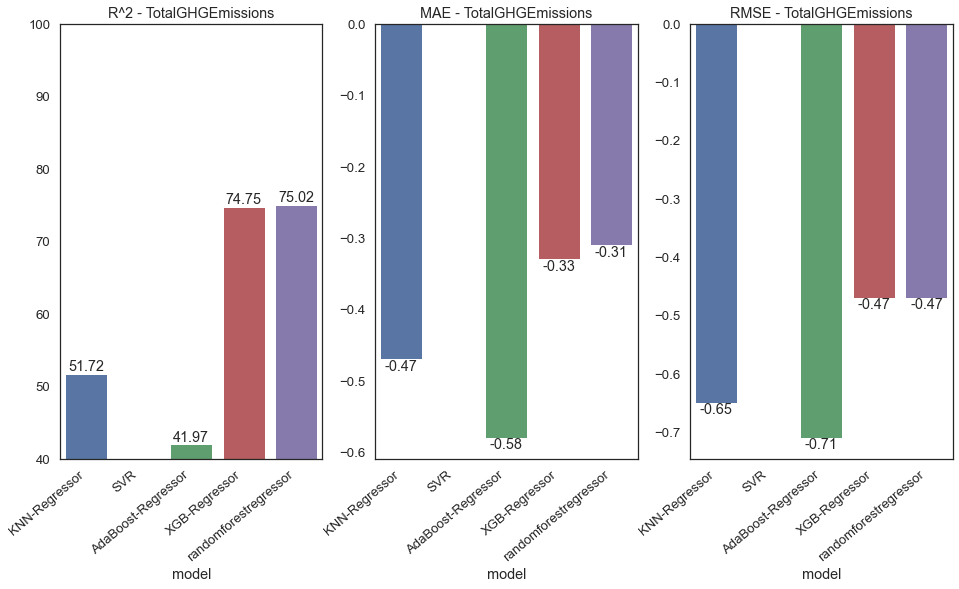

In [28]:
sns.set(style="white", font_scale=1.2)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

sns.barplot(
    data=co2_other_models[co2_other_models["R^2"] > 0],
    y="R^2",
    x=co2_other_models["model"],
    orient="v",
    ax=ax[0],
)

ax[0].set(title="R^2 - TotalGHGEmissions", ylabel=None, ylim=[40,100])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")


sns.barplot(
    data=co2_other_models[co2_other_models["R^2"] > 0],
    y="MAE",
    x=co2_other_models["model"],
    orient="v",
    ax=ax[1],
)

ax[1].set(title="MAE - TotalGHGEmissions", ylabel=None)
ax[1].bar_label(ax[1].containers[0])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")


sns.barplot(
    data=co2_other_models[co2_other_models["R^2"] > 0],
    y="RMSE",
    x=co2_other_models["model"],
    orient="v",
    ax=ax[2],
)

ax[2].set(title="RMSE - TotalGHGEmissions", ylabel=None)
ax[2].bar_label(ax[2].containers[0])
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=40, ha="right")


fig.tight_layout;

- Best estimateur de RandomForestRegressor pour la variable **TotalGHGEmissions**

In [29]:
co2_other_models.loc[co2_other_models["model"]=="randomforestregressor",["best_params"]].to_dict()

{'best_params': {4: {'randomforestregressor__n_estimators': 400,
   'randomforestregressor__max_features': 0.33,
   'randomforestregressor__max_depth': None,
   'randomforestregressor__bootstrap': False}}}

- Afficher le résultat du tunning des hyper-paramètres pour la variable **SiteEnergyUse(kBtu)**

In [30]:
%%time

energy_other_models = tunne_models_v2(
    estimator_params=model_params,
    X_train_tr=X_train_energy_tr,
    y_train_tr=y_train_energy_tr,
    y_name="SiteEnergyUse(kBtu)",
    n_iter=5,
    n_fold=5,
)

energy_other_models

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[13:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Wall time: 1min 32s


,model,R^2,MAE,RMSE,best_params
0,KNN-Regressor,69.56,-1.46,-2.10,"{'KNN-Regressor__weights': 'distance', 'KNN-Re..."
1,SVR,-14331594.08,-193.15,-648.19,"{'SVR__kernel': 'rbf', 'SVR__gamma': 'scale', ..."
2,AdaBoost-Regressor,65.34,-1.68,-2.24,"{'AdaBoost-Regressor__n_estimators': 50, 'AdaB..."
3,XGB-Regressor,87.30,-0.89,-1.35,"{'XGB-Regressor__subsample': 0.5, 'XGB-Regress..."
4,randomforestregressor,86.45,-0.85,-1.40,"{'randomforestregressor__n_estimators': 400, '..."


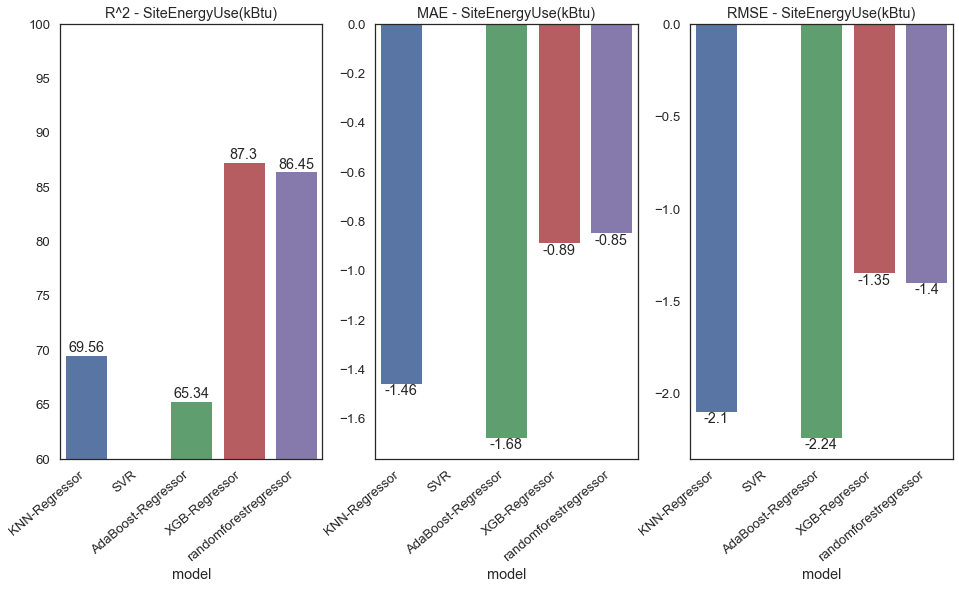

In [31]:
sns.set(style="white", font_scale=1.2)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

sns.barplot(
    data=energy_other_models[energy_other_models["R^2"] > 0],
    y="R^2",
    x=energy_other_models["model"],
    orient="v",
    ax=ax[0],
)

ax[0].set(title="R^2 - SiteEnergyUse(kBtu)", ylabel=None, ylim=[60,100])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")


sns.barplot(
    data=energy_other_models[energy_other_models["R^2"] > 0],
    y="MAE",
    x=energy_other_models["model"],
    orient="v",
    ax=ax[1],
)

ax[1].set(title="MAE - SiteEnergyUse(kBtu)", ylabel=None)
ax[1].bar_label(ax[1].containers[0])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")


sns.barplot(
    data=energy_other_models[energy_other_models["R^2"] > 0],
    y="RMSE",
    x=energy_other_models["model"],
    orient="v",
    ax=ax[2],
)

ax[2].set(title="RMSE - SiteEnergyUse(kBtu)", ylabel=None)
ax[2].bar_label(ax[2].containers[0])
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=40, ha="right")


fig.tight_layout;

- Best estimateur de RandomForestRegressor pour la variable **SiteEnergyUse(kBtu)**

In [32]:
energy_other_models.loc[energy_other_models["model"]=="XGB-Regressor",["best_params"]].to_dict()

{'best_params': {3: {'XGB-Regressor__subsample': 0.5,
   'XGB-Regressor__n_estimators': 200,
   'XGB-Regressor__min_child_weight': 1,
   'XGB-Regressor__max_depth': 10,
   'XGB-Regressor__learning_rate': 0.1,
   'XGB-Regressor__colsample_bytree': 0.5,
   'XGB-Regressor__': 0.05}}}

*********
# <font color=#025172>Chapitre 4 : Feature selection</font>
*********

- L'objectif de cette section est de réduire le temps d'entrainement des modèles.
- Cet objectif passe par 2 étapes :
    - La réduction du nombre de variables d'entrée sans impacter la performance des modèles.<br>
    - Trouver une stratégie d'hyper-paramètres plus rapide que RandomizedSeachCV.

<img src='http://www.seattle.gov/Images/Council/Logos/City-of-Seattle-Logo_Color-on-Transparent.png' width=45px align="left"/> 
<div style="vertical-align: middle">
    <h2>
    <font color=#0046AD>&emsp; 4.1 Feature selection sur la variable transformée: TotalGHGEmissions
        </font>
    </h2>
</div>

In [33]:
%%time 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_regression


np.random.seed(20)

rf_co2_estimator = RandomForestRegressor(bootstrap=False,
                                         max_features=0.33,
                                         n_estimators=400,
                                         random_state=20
                                        )


pipeline_co2 = Pipeline([("preprocessor", preprocessor),
                         ("selector", SelectKBest(mutual_info_regression)),
                         ("randomforestregressor", rf_co2_estimator)
                        ])

search_space = [{"selector__k": [30, 50, 60, 70]}]

kfold = KFold(n_splits=5, shuffle=True, random_state=20)

co2_selector_search = GridSearchCV(
    estimator=pipeline_co2,
    param_grid=search_space,
    cv=kfold,
    verbose=True,
    scoring=["r2",
             "neg_mean_absolute_error",
             "neg_root_mean_squared_error"
            ],
    refit="r2",
    n_jobs=-2,
).fit(X_train_co2_tr,y_train_co2_tr)


co2_selector_r2 = round(co2_selector_search.cv_results_["mean_test_r2"].mean()*100,2)
co2_selector_mae = round(co2_selector_search.cv_results_["mean_test_neg_mean_absolute_error"].mean(),2)
co2_selector_rmse = round(co2_selector_search.cv_results_["mean_test_neg_root_mean_squared_error"].mean(),2)

print("R^2 moyen cv : ", co2_selector_r2)
print("MEA cv: ", co2_selector_mae)
print("RMSE cv: ", co2_selector_rmse)
print("-" * 80)
print("meilleur score R^2",round(co2_selector_search.best_score_ * 100, 2))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
R^2 moyen cv :  76.08
MEA cv:  -0.28
RMSE cv:  -0.46
--------------------------------------------------------------------------------
meilleur score R^2 76.29
Wall time: 43.3 s


- La meilleure valeur de k qui permet d'avoir le meilleur score R^2

In [34]:
co2_selector_search.best_params_

{'selector__k': 70}

In [35]:
len(co2_selector_search.best_estimator_.named_steps['selector'].get_support())

96

In [36]:
sum(co2_selector_search.best_estimator_.named_steps['selector'].get_support())

70

<blockquote>
    - Avec une valeur k=70, SelectKBest() réduira le nombre de variables avec RandomForestRegressor de 104 variables à 70 seulement.
</blockquote>

<img src='http://www.seattle.gov/Images/Council/Logos/City-of-Seattle-Logo_Color-on-Transparent.png' width=45px align="left"/> 
<div style="vertical-align: middle">
    <h2>
    <font color=#0046AD>&emsp; 4.2 Feature selection sur la variable transformée: SiteEnergyUse(kBtu)
        </font>
    </h2>
</div>

In [66]:
%%time 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import mutual_info_regression


np.random.seed(20)

rf_energy_estimator = XGBRegressor(subsample= 0.5,
                                   n_estimators= 200,
                                   min_child_weight= 1,
                                   max_depth= 10,
                                   learning_rate= 0.1,
                                   colsample_bytree= 0.5,
                                  )


pipeline_energy = Pipeline([("preprocessor", preprocessor),
                         ("selector", SelectKBest(mutual_info_regression)),
                         ("randomforestregressor", rf_energy_estimator)
                        ])

search_space = [{"selector__k": [30, 50, 60, 70]}]

kfold = KFold(n_splits=5, shuffle=True, random_state=20)

energy_selector_search = GridSearchCV(
    estimator=pipeline_energy,
    param_grid=search_space,
    cv=kfold,
    verbose=True,
    scoring=["r2",
             "neg_mean_absolute_error",
             "neg_root_mean_squared_error"
            ],
    refit="r2",
    n_jobs=-2,
).fit(X_train_energy_tr,y_train_energy_tr)


energy_selector_r2 = round(energy_selector_search.cv_results_["mean_test_r2"].mean()*100,2)
energy_selector_mae = round(energy_selector_search.cv_results_["mean_test_neg_mean_absolute_error"].mean(),2)
energy_selector_rmse = round(energy_selector_search.cv_results_["mean_test_neg_root_mean_squared_error"].mean(),2)

print("R^2 moyen cv : ", energy_selector_r2)
print("MEA cv: ", energy_selector_mae)
print("RMSE cv: ", energy_selector_rmse)
print("-" * 80)
print("meilleur score R^2",round(energy_selector_search.best_score_ * 100, 2))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
R^2 moyen cv :  87.8
MEA cv:  -0.81
RMSE cv:  -1.32
--------------------------------------------------------------------------------
meilleur score R^2 88.37
Wall time: 22.1 s


- La meilleure valeur de k qui permet d'avoir le meilleur score R^2

In [67]:
energy_selector_search.best_params_

{'selector__k': 70}

In [68]:
len(energy_selector_search.best_estimator_.named_steps['selector'].get_support())

96

In [69]:
sum(energy_selector_search.best_estimator_.named_steps['selector'].get_support())

70

<blockquote>
    - Avec une valeur k=60, SelectKBest() réduira le nombre de variables avec XGBRegressor de 104 variables à 60 seulement.
</blockquote>

*********
# <font color=#025172>Chapitre 5 : Evaluer la performance sur le test set</font>
*********

<img src='http://www.seattle.gov/Images/Council/Logos/City-of-Seattle-Logo_Color-on-Transparent.png' width=45px align="left"/> 
<div style="vertical-align: middle">
    <h2>
    <font color=#0046AD>&emsp; 5.1 Performance du modèle sur la variable transformée: TotalGHGEmissions
        </font>
    </h2>
</div>

In [70]:
%%time

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

np.random.seed(20)

rf_co2_estimator = RandomForestRegressor(bootstrap=False,
                                         max_features=0.33,
                                         n_estimators=400,
                                         random_state=20
                                        )

pipeline_co2 = Pipeline([("preprocessor", preprocessor),
                         ("selector", SelectKBest(mutual_info_regression, k=70)),
                         ("randomforestregressor", rf_co2_estimator)
                        ])

pipeline_co2.fit(X_train_co2_tr, y_train_co2_tr)

co2_testdata_r2 = round(r2_score(y_test_co2_tr, pipeline_co2.predict(X_test_co2_tr)) *100,2)
co2_testdata_mean = round(mean_absolute_error(y_test_co2_tr, pipeline_co2.predict(X_test_co2_tr)),2)
co2_testdata_mse = mean_squared_error(y_test_co2_tr, pipeline_co2.predict(X_test_co2_tr))
co2_testdata_rmse = round(sqrt(co2_testdata_mse),2)

print("RandomForest Regressor Performance on GHEmission Test Data Set")
print("R^2 :",co2_testdata_r2,"%")
print("MAE :",co2_testdata_mean)
print("RMSE :",co2_testdata_rmse)

# print('R^2 sur le test set: ' + str(round(pipeline_co2.score(X_test_co2_tr,y_test_co2_tr),2) * 100))

RandomForest Regressor Performance on GHEmission Test Data Set
R^2 : 80.87 %
MAE : 0.24
RMSE : 0.42
Wall time: 7.69 s


<img src='http://www.seattle.gov/Images/Council/Logos/City-of-Seattle-Logo_Color-on-Transparent.png' width=45px align="left"/> 
<div style="vertical-align: middle">
    <h2>
    <font color=#0046AD>&emsp; 5.2 Performance du modèle sur la variable transformée: SiteEnergyUse(kBtu)
        </font>
    </h2>
</div>

In [71]:
%%time

np.random.seed(20)

rf_energy_estimator = XGBRegressor(subsample= 0.5,
                                   n_estimators= 200,
                                   min_child_weight= 1,
                                   max_depth= 10,
                                   learning_rate= 0.1,
                                   colsample_bytree= 0.5,
                                  )


pipeline_energy = Pipeline([("preprocessor", preprocessor),
                         ("selector", SelectKBest(mutual_info_regression, k=70)),
                         ("randomforestregressor", rf_energy_estimator)
                        ])

pipeline_energy.fit(X_train_energy_tr, y_train_energy_tr)

energy_testdata_r2 = round(r2_score(y_test_energy_tr, pipeline_energy.predict(X_test_energy_tr)) *100,2)
energy_testdata_mean = round(mean_absolute_error(y_test_energy_tr, pipeline_energy.predict(X_test_energy_tr)),2)
energy_testdata_mse = mean_squared_error(y_test_energy_tr, pipeline_energy.predict(X_test_energy_tr))
energy_testdata_rmse = round(sqrt(energy_testdata_mse),2)

print("RandomForest Regressor Performance on Energy use Test Data Set")
print("R^2 :",energy_testdata_r2,"%")
print("MAE :",energy_testdata_mean)
print("RMSE :",energy_testdata_rmse)
# print('R^2 sur le test set: ' + str(round(pipeline_energy.score(X_test_energy_tr,y_test_energy_tr),2) * 100))

RandomForest Regressor Performance on Energy use Test Data Set
R^2 : 90.21 %
MAE : 0.73
RMSE : 1.18
Wall time: 2.78 s


<img src='http://www.seattle.gov/Images/Council/Logos/City-of-Seattle-Logo_Color-on-Transparent.png' width=45px align="left"/> 
<div style="vertical-align: middle">
    <h2>
    <font color=#0046AD>&emsp; 5.3 Comparer les performances des modèles sur le Traning et le Test set.
        </font>
    </h2>
</div>

#### <font color=#0046AD>5.3.1 Préparer les metrics pour la variable : `TotalGHGEmissions`.</font>

- Estimer les scores pour le modèle tunned sans features selection pour la visualisation.

In [72]:
np.random.seed(20)

# Intialisation du pipeline du modèle 
pipe_co2_tunned = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "randomforestregressor",
            RandomForestRegressor(n_estimators=400, max_features=0.33, bootstrap=False),
        ),
    ]
)

# Entrainement du modèle sur le training set
pipe_co2_tunned.fit(X_train_co2_tr,y_train_co2_tr)

# Calcul des metrics sur le test set pour le modèle tunned sans features selection

co2_tunned_r2 = round(r2_score(y_test_co2_tr, pipe_co2_tunned.predict(X_test_co2_tr)) *100,2)
co2_tunned_mae = round(mean_absolute_error(y_test_co2_tr, pipe_co2_tunned.predict(X_test_co2_tr)),2)
co2_tunned_mse = mean_squared_error(y_test_co2_tr, pipe_co2_tunned.predict(X_test_co2_tr))
co2_tunned_rmse = round(sqrt(co2_testdata_mse),2)

- Préparer un dataframe pour la visualisation.

In [73]:
co2_r2_synthese = [
    baseline_models["TotalGHGEmissions transformed data"]["R^2_tr"][0],
    models_tunned_step1["TotalGHGEmissions transformed data"]["R^2_tr"][0],
    co2_selector_r2,
    np.nan,
    co2_tunned_r2,
    co2_testdata_r2,
]

co2_mae_synthese = [
    baseline_models["TotalGHGEmissions transformed data"]["MAE_tr"][0],
    models_tunned_step1["TotalGHGEmissions transformed data"]["MAE_tr"][0],
    co2_selector_mae,
    np.nan,
    co2_tunned_mae,
    co2_testdata_mean,
]

co2_rmse_synthese = [
    baseline_models["TotalGHGEmissions transformed data"]["RMSE_tr"][0],
    models_tunned_step1["TotalGHGEmissions transformed data"]["RMSE_tr"][0],
    co2_selector_rmse,
    np.nan,
    co2_tunned_rmse,
    co2_testdata_rmse,
]

co2_df_overall_perf = pd.DataFrame(
    data=[co2_r2_synthese, co2_mae_synthese, co2_rmse_synthese],
    index=["R^2", "MAE", "RMSE"],
    columns=[
        "baseline model",
        "tunned model",
        "tunned model + feature selection",
        "",
        "tunned model on test data",
        "tunned model + feature selection on test data",
    ],
).T

- Visualisation des résultats.

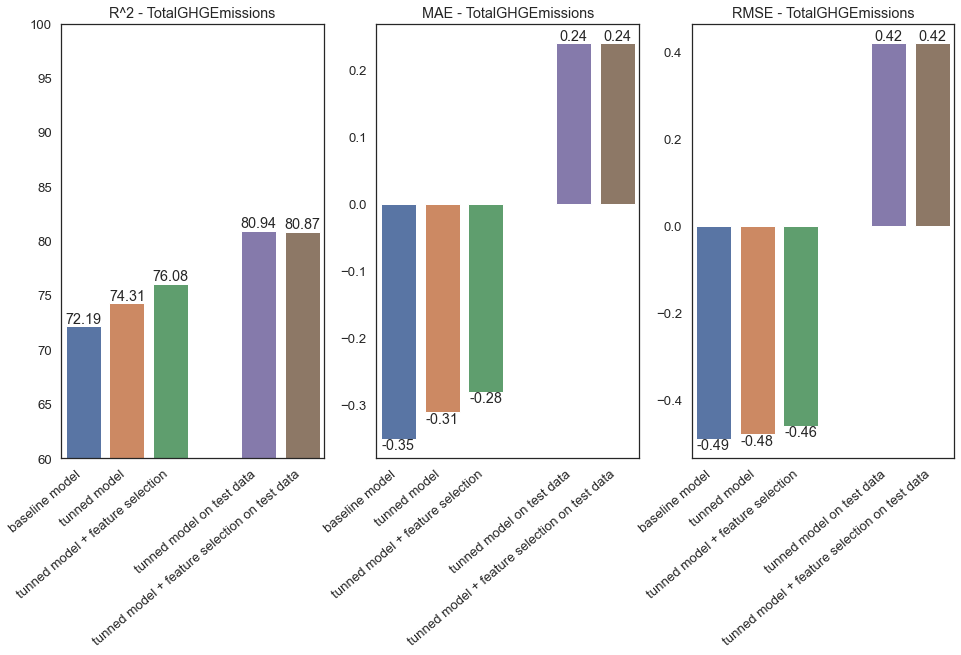

In [74]:
sns.set(style="white", font_scale=1.2)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

sns.barplot(
    data=co2_df_overall_perf,
    y="R^2",
    x=co2_df_overall_perf.index,
    orient="v",
    ax=ax[0],
)

ax[0].set(title="R^2 - TotalGHGEmissions", ylabel=None, ylim=[60,100])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")


sns.barplot(
    data=co2_df_overall_perf,
    y="MAE",
    x=co2_df_overall_perf.index,
    orient="v",
    ax=ax[1],
)

ax[1].set(title="MAE - TotalGHGEmissions", ylabel=None)
ax[1].bar_label(ax[1].containers[0])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")


sns.barplot(
    data=co2_df_overall_perf,
    y="RMSE",
    x=co2_df_overall_perf.index,
    orient="v",
    ax=ax[2],
)

ax[2].set(title="RMSE - TotalGHGEmissions", ylabel=None)
ax[2].bar_label(ax[2].containers[0])
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=40, ha="right")


fig.tight_layout;

- Visualisation de y_true en fonction de y_preds

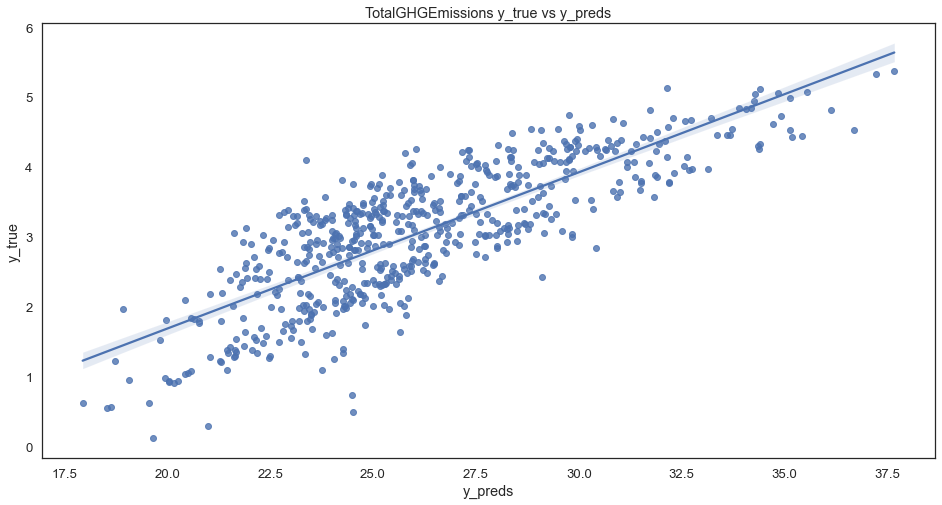

In [97]:
sns.set(style="white", font_scale=1.2)

fig, ax = plt.subplots(figsize=(16, 8))

sns.regplot(
    x=pipeline_energy.predict(X_test_co2_tr),
    y=y_test_co2_tr,
    ax=ax,
)

ax.set(title="TotalGHGEmissions y_true vs y_preds", ylabel="y_true", xlabel="y_preds");

#### <font color=#0046AD>5.3.2 Préparer les metrics pour la variable : `SiteEnergyUse(kBtu)`.</font>

- Estimer les scores pour le baseline modèle pour la visualisation.

In [76]:
from sklearn.model_selection import cross_validate

np.random.seed(20)

# Intialisation du pipeline du modèle
pipe_xgb_baseline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "XGB-Regressor",
            XGBRegressor(random_state=20),
        ),
    ]
)

# Calcule des metrics avec une cross-validation
xgb_baseline_results = cross_validate(
    pipe_xgb_baseline,
    X_train_energy_tr,
    y_train_energy_tr,
    cv=5,
    scoring=["r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"],
    n_jobs=-2,
    error_score="raise",
)

xgb_baseline_r2 = round(xgb_baseline_results["test_r2"].mean() * 100, 2)
xgb_baseline_mae = round(xgb_baseline_results["test_neg_mean_absolute_error"].mean(), 2)
xgb_baseline_rmse = round(xgb_baseline_results["test_neg_root_mean_squared_error"].mean(), 2)

- Estimer les scores pour le modèle tunned sans features selection pour la visualisation.

In [78]:
# Intialisation du pipeline du modèle
xgb_tunned = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "XGB-Regressor",
            XGBRegressor(
                subsample=0.5,
                n_estimators=200,
                min_child_weight=1,
                max_depth=10,
                learning_rate=0.1,
                colsample_bytree=0.5,
                random_state=20,
            ),
        ),
    ]
)

# Entrainement du modèle sur le training set
xgb_tunned.fit(X_train_energy_tr, y_train_energy_tr)

# Calcul des metrics sur le test set pour le modèle tunned sans features selection

xgb_tunned_test_r2 = round(
    r2_score(y_test_energy_tr, xgb_tunned.predict(X_test_energy_tr)) * 100, 2
)
xgb_tunned_test_mae = round(
    mean_absolute_error(y_test_energy_tr, xgb_tunned.predict(X_test_energy_tr)), 2
)
xgb_tunned_test_mse = mean_squared_error(
    y_test_energy_tr, xgb_tunned.predict(X_test_energy_tr)
)
xgb_tunned_test_rmse = round(sqrt(co2_testdata_mse), 2)

- Préparer un dataframe pour la visualisation.

In [79]:
energy_r2_synthese = [
    xgb_baseline_r2,
    energy_other_models.iloc[3,1],
    energy_selector_r2,
    np.nan,
    xgb_tunned_test_r2,
    energy_testdata_r2,
]

energy_mae_synthese = [
    xgb_baseline_mae,
    energy_other_models.iloc[3,2],
    energy_selector_mae,
    np.nan,
    xgb_tunned_test_mae,
    energy_testdata_mean,
]

energy_rmse_synthese = [
    xgb_baseline_rmse,
    energy_other_models.iloc[3,3],
    energy_selector_rmse,
    np.nan,
    xgb_tunned_test_rmse,
    energy_testdata_rmse,
]

energy_df_overall_perf = pd.DataFrame(
    data=[energy_r2_synthese, energy_mae_synthese, energy_rmse_synthese],
    index=["R^2", "MAE", "RMSE"],
    columns=[
        "baseline model",
        "tunned model",
        "tunned model + feature selection",
        "",
        "tunned model on test data",
        "tunned model + feature selection on test data",
    ],
).T

- Visualisation des résultats.

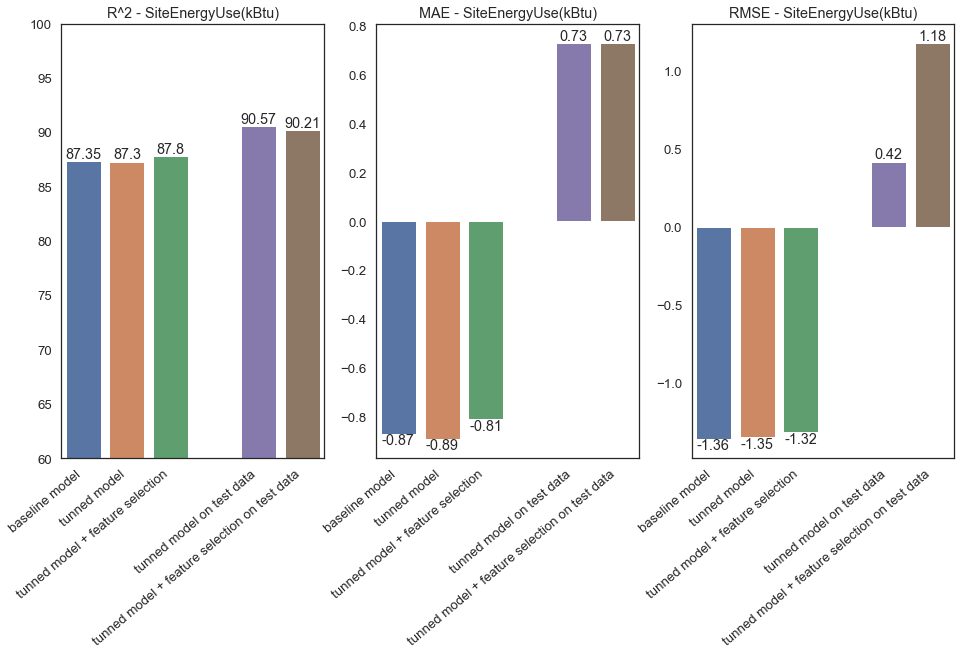

In [80]:
sns.set(style="white", font_scale=1.2)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

sns.barplot(
    data=energy_df_overall_perf,
    y="R^2",
    x=energy_df_overall_perf.index,
    orient="v",
    ax=ax[0],
)

ax[0].set(title="R^2 - SiteEnergyUse(kBtu)", ylabel=None, ylim=[60,100])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")


sns.barplot(
    data=energy_df_overall_perf,
    y="MAE",
    x=energy_df_overall_perf.index,
    orient="v",
    ax=ax[1],
)

ax[1].set(title="MAE - SiteEnergyUse(kBtu)", ylabel=None)
ax[1].bar_label(ax[1].containers[0])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")


sns.barplot(
    data=energy_df_overall_perf,
    y="RMSE",
    x=energy_df_overall_perf.index,
    orient="v",
    ax=ax[2],
)

ax[2].set(title="RMSE - SiteEnergyUse(kBtu)", ylabel=None)
ax[2].bar_label(ax[2].containers[0])
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=40, ha="right")


fig.tight_layout;

- Visualisation de y_true en fonction de y_preds

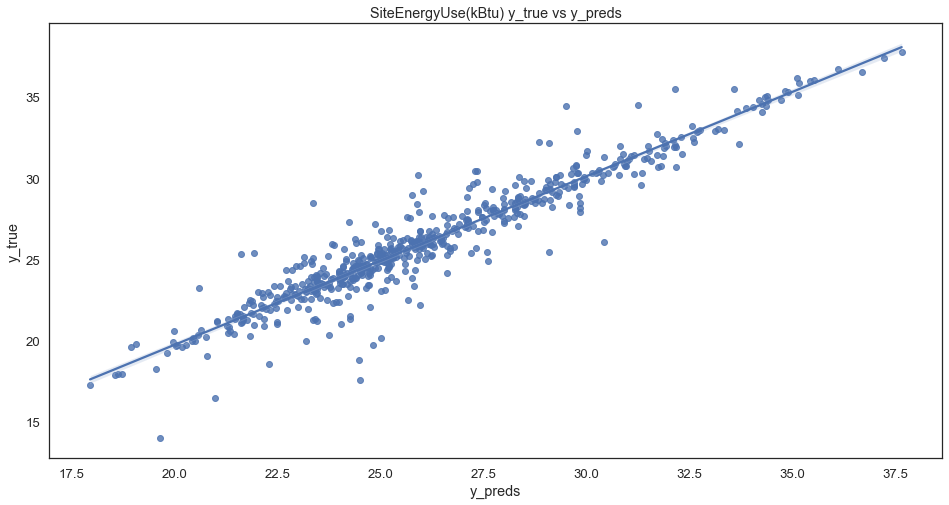

In [81]:
sns.set(style="white", font_scale=1.2)

fig, ax = plt.subplots(figsize=(16, 8))

sns.regplot(
    x=pipeline_energy.predict(X_test_energy_tr),
    y=y_test_energy_tr,
    ax=ax,
);

ax.set(title="SiteEnergyUse(kBtu) y_true vs y_preds", ylabel="y_true", xlabel="y_preds");

*********
# <font color=#025172>Chapitre 6 : Evaluer l'impact de la variable `ENERGYSTARScore`</font>
*********

<img src='http://www.seattle.gov/Images/Council/Logos/City-of-Seattle-Logo_Color-on-Transparent.png' width=45px align="left"/> 
<div style="vertical-align: middle">
    <h2>
    <font color=#0046AD>&emsp; 6.1 Impact sur la varialbe TotalGHGEmissions
        </font>
    </h2>
</div>

#### <font color=#0046AD>6.1.1 Importance de la variable ENERGYSTARScore.</font>

In [82]:
from sklearn.base import clone

In [83]:
pipeline_co2_copy = clone(pipeline_co2, safe=True)

In [84]:
pipeline_co2_copy.fit(X_train_co2_tr, y_train_co2_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA'...
                                                  Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'ComplianceStatus'],
      dtype='object'))])),
                ('selector',
                 SelectKBest(k=70,
                             score_func=<function mutual_info_regre

In [85]:
onehot_columns_co2 = list(
    pipeline_co2_copy.named_steps["preprocessor"]
    .named_transformers_["categorical"]
    .named_steps["onehot"]
    .get_feature_names()
)
features_list_co2 = list(numerical_columns)
features_list_co2.extend(onehot_columns_co2)

In [86]:
mask = pipeline_co2_copy.named_steps["selector"].get_support() #list of booleans

new_features = [] # The list of your K best features

for bool, feature in zip(mask, features_list_co2):

    if bool == True:

        new_features.append(feature)

In [87]:
co2_feature_importance = pd.DataFrame(
    data=[
        new_features,
        pipeline_co2_copy.named_steps["randomforestregressor"].feature_importances_,
    ],
    index=["Feature", "Importance"],
).T

In [88]:
co2_feature_importance["Importance"] = co2_feature_importance["Importance"].apply(lambda x : round(x*100,1))

In [89]:
co2_feature_importance.sort_values(by="Importance", ascending=False).head(10)

,Feature,Importance
4,PropertyGFABuilding(s),19.2
2,PropertyGFATotal,14.4
5,LargestPropertyUseTypeGFA,11.9
69,x6_Non-Compliant,6.1
10,Longitude,4.8
9,Latitude,4.5
8,ENERGYSTARScore,4.5
6,SecondLargestPropertyUseTypeGFA,4.3
1,NumberofFloors,3.9
22,x1_Self-Storage,2.2


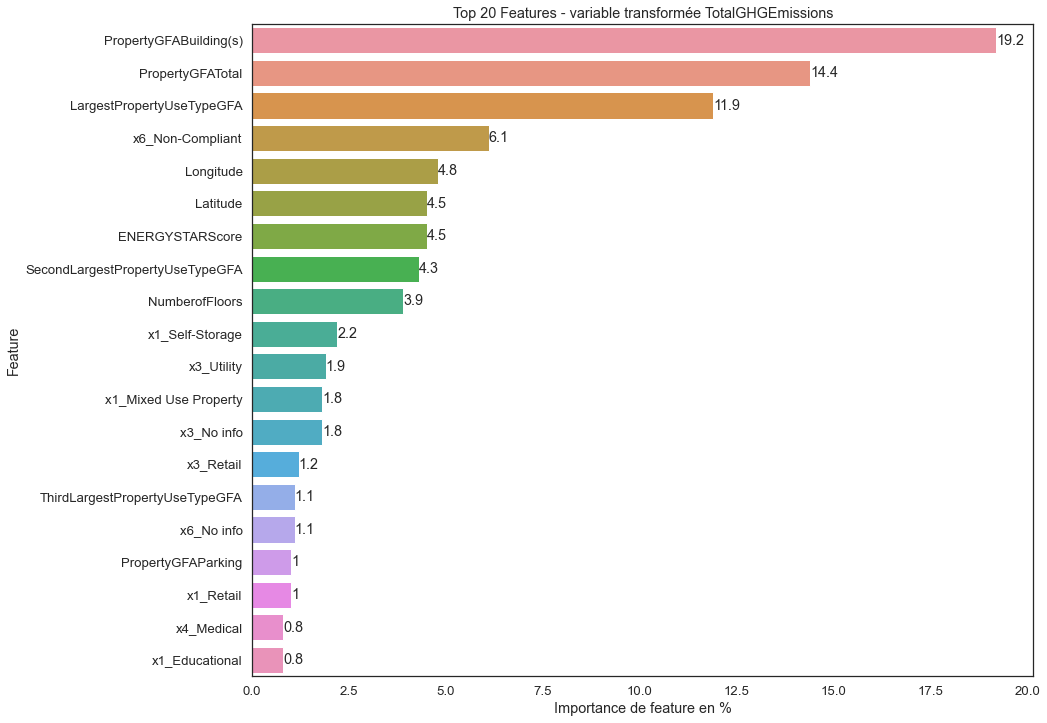

In [90]:
fig, ax = plt.subplots(figsize=(14,12))
    
sns.barplot(
    data=co2_feature_importance.sort_values(by="Importance", ascending=False).head(20),
    x="Importance",
    y="Feature",
    orient="h",
    ax=ax,
)

ax.set(title="Top 20 Features - variable transformée TotalGHGEmissions", xlabel='Importance de feature en %');
ax.bar_label(ax.containers[0]);
fig.tight_layout;

#### <font color=#0046AD>6.1.2 Impact de la variable ENERGYSTARScore sur R^2.</font>

In [91]:
np.random.seed(20)

categorical_columns = cleaned_data.select_dtypes(include=["object"]).columns
categorical_transformer = Pipeline(
    steps=[("onehot", OneHotEncoder(#categories=ohe_cat
                                    sparse=False, 
                                    handle_unknown="ignore")
           )] 
)


numerical_columns_without_ENERGYSTARScore = (
    cleaned_data.select_dtypes(include=["int64", "float64"])
    .drop(["TotalGHGEmissions",
           "SiteEnergyUse(kBtu)",
           "transformed_TotalGHGEmissions",
           "transformed_SiteEnergyUse(kBtu)",
           "ENERGYSTARScore"], axis=1)
    .columns
)
numerical_transformer = Pipeline(steps=[("scaler", StandardScaler())])


# Combiner les transformers dans une étape preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer, numerical_columns_without_ENERGYSTARScore),
        ("categorical", categorical_transformer, categorical_columns),
    ],
    remainder="passthrough",
)


pipe_co2 = Pipeline([("preprocessor", preprocessor),
                     ("selector", SelectKBest(mutual_info_regression, k=70)),
                     ("randomforestregressor", rf_co2_estimator)
                    ])

In [92]:
pipe_co2.fit(X_train_co2_tr, y_train_co2_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA'...
                                                  Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'ComplianceStatus'],
      dtype='object'))])),
                ('selector',
                 SelectKBest(k=70,
                             score_func=<function mutual_info_regre

In [93]:
r2_with_ENERGYSTARScore = round(pipeline_co2_copy.score(X_test_co2_tr,y_test_co2_tr)*100,2)
r2_without_ENERGYSTARScore = round(pipe_co2.score(X_test_co2_tr,y_test_co2_tr)*100,2)
print("R^2 TotalGHGEmissions with ENERGYSTARScore :",r2_with_ENERGYSTARScore,"%")
print("R^2 TotalGHGEmissions without ENERGYSTARScore :",r2_without_ENERGYSTARScore,"%")

R^2 TotalGHGEmissions with ENERGYSTARScore : 80.87 %
R^2 TotalGHGEmissions without ENERGYSTARScore : 80.87 %


In [94]:
df_co2 = pd.DataFrame(
    [r2_with_ENERGYSTARScore, r2_without_ENERGYSTARScore],
    index=[
        "R^2 with ENERGYSTARScore",
        "R^2 without ENERGYSTARScore",
    ],
    columns=["R^2"],
)

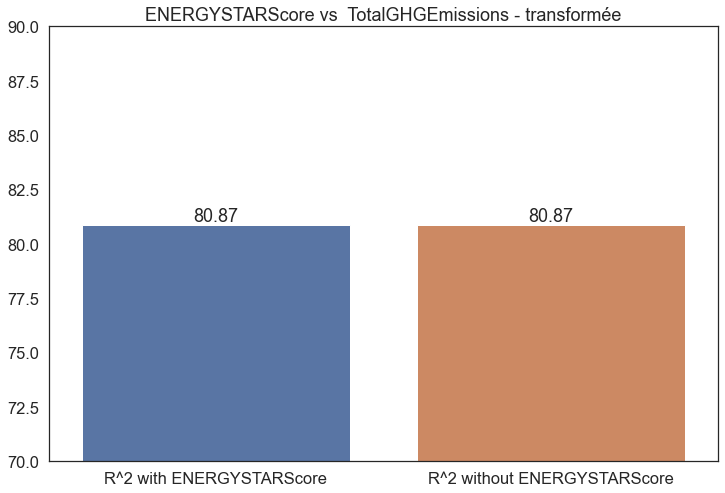

In [95]:
sns.set(style="white", font_scale=1.5)

fig, ax = plt.subplots(figsize=(12,8))
    
sns.barplot(
    data=df_co2,
    y="R^2",
    x=df_co2.index,
    orient="v",
    ax=ax,
)

ax.set(title="ENERGYSTARScore vs  TotalGHGEmissions - transformée",ylabel=None, ylim=[70,90]);
ax.bar_label(ax.containers[0])

fig.tight_layout;